### Exploratory Data Analysis for Addidas USA sales data

### 2) Data Collection
- The data consists of 17 column and 9648 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [43]:
df = pd.read_csv('Addidas_dataset/Adidas US Sales Datasets.csv')

#### Show Top 5 Records

In [44]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Sales person,Campaign,Category,Segment
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store,Dennison Crosswaite,21,Rural,Moderation
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store,Husein Augar,17,Rural,Convenience
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store,Oby Sorrel,1,Mix,All Season
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store,Dennison Crosswaite,18,Youth,Accessory
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store,Curtice Advani,8,Urban,Select


### Drop unnecessary records

In [45]:
df.columns


Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'Sales person',
       'Campaign', 'Category', 'Segment'],
      dtype='object')

In [46]:
df = df.drop(columns=['Retailer ID', 'Invoice Date', 'State','Operating Profit', 'Operating Margin'])

In [47]:
df.head()

,Retailer,Region,City,Product,Price per Unit,Units Sold,Total Sales,Sales Method,Sales person,Campaign,Category,Segment
0,Foot Locker,Northeast,New York,Men's Street Footwear,$50.00,"1,200","$600,000",In-store,Dennison Crosswaite,21,Rural,Moderation
1,Foot Locker,Northeast,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000",In-store,Husein Augar,17,Rural,Convenience
2,Foot Locker,Northeast,New York,Women's Street Footwear,$40.00,"1,000","$400,000",In-store,Oby Sorrel,1,Mix,All Season
3,Foot Locker,Northeast,New York,Women's Athletic Footwear,$45.00,850,"$382,500",In-store,Dennison Crosswaite,18,Youth,Accessory
4,Foot Locker,Northeast,New York,Men's Apparel,$60.00,900,"$540,000",In-store,Curtice Advani,8,Urban,Select


#### Shape of the dataset

In [48]:
df.shape

(9648, 12)

In [49]:
df.columns

Index(['Retailer', 'Region', 'City', 'Product', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Sales Method', 'Sales person', 'Campaign', 'Category',
       'Segment'],
      dtype='object')

### 2.2 Dataset information

- Retailer : Retailer Name
- Region : Region of Sale
- City : city of sale
- Product : Name of product
- Price per Unit : Price of product
- Units Sold : Quantity Sold
- Total Sales : Total Sale
- Sales Method : Sales Channel
- Sales person : Person who made the sale
- Campaign : Campaign type
- Category : Environment
- Segment : Sale Segmentation


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [50]:
df.isna().sum()

Retailer          0
Region            0
City              0
Product           0
Price per Unit    0
Units Sold        0
Total Sales       0
Sales Method      0
Sales person      0
Campaign          0
Category          0
Segment           0
dtype: int64

### 3.2 Check Duplicates

In [51]:
df.duplicated().sum()

0

### 3.3 Check data types

In [52]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Retailer        9648 non-null   object
 1   Region          9648 non-null   object
 2   City            9648 non-null   object
 3   Product         9648 non-null   object
 4   Price per Unit  9648 non-null   object
 5   Units Sold      9648 non-null   object
 6   Total Sales     9648 non-null   object
 7   Sales Method    9648 non-null   object
 8   Sales person    9648 non-null   object
 9   Campaign        9648 non-null   int64 
 10  Category        9648 non-null   object
 11  Segment         9648 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.6+ KB


### Convert Price per Unit, Units Sold, and Total Sales to float

In [53]:
df['Price per Unit'] = df['Price per Unit'].str.replace(r'$', '', regex=True)
df['Price per Unit'] = df['Price per Unit'].str.replace(r',', '', regex=True)

df['Total Sales'] = df['Total Sales'].str.replace(r'$', '', regex=True)
df['Total Sales'] = df['Total Sales'].str.replace(r',', '', regex=True)

df['Units Sold'] = df['Units Sold'].str.replace(',','', regex=True)
#df.replace(',','', regex=True, inplace=True)

In [54]:
df.head(100)

,Retailer,Region,City,Product,Price per Unit,Units Sold,Total Sales,Sales Method,Sales person,Campaign,Category,Segment
0,Foot Locker,Northeast,New York,Men's Street Footwear,50.00,1200,600000,In-store,Dennison Crosswaite,21,Rural,Moderation
1,Foot Locker,Northeast,New York,Men's Athletic Footwear,50.00,1000,500000,In-store,Husein Augar,17,Rural,Convenience
2,Foot Locker,Northeast,New York,Women's Street Footwear,40.00,1000,400000,In-store,Oby Sorrel,1,Mix,All Season
3,Foot Locker,Northeast,New York,Women's Athletic Footwear,45.00,850,382500,In-store,Dennison Crosswaite,18,Youth,Accessory
4,Foot Locker,Northeast,New York,Men's Apparel,60.00,900,540000,In-store,Curtice Advani,8,Urban,Select
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Walmart,South,Houston,Women's Athletic Footwear,40.00,700,280000,Outlet,Andria Kimpton,8,Accessory,Moderation
96,Walmart,South,Houston,Men's Apparel,45.00,600,270000,Outlet,Dennison Crosswaite,5,Accessory,Convenience
97,Walmart,South,Houston,Women's Apparel,40.00,950,380000,Outlet,Brien Boise,10,Mix,Moderation
98,Walmart,South,Houston,Men's Street Footwear,40.00,950,380000,Outlet,Van Tuxwell,3,Youth,Moderation


In [55]:
df['Price per Unit'] = df['Price per Unit'].astype('float64') 
df['Units Sold'] = df['Units Sold'].astype('float64') 
df['Total Sales'] = df['Total Sales'].astype('float64') 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Retailer        9648 non-null   object 
 1   Region          9648 non-null   object 
 2   City            9648 non-null   object 
 3   Product         9648 non-null   object 
 4   Price per Unit  9648 non-null   float64
 5   Units Sold      9648 non-null   float64
 6   Total Sales     9648 non-null   float64
 7   Sales Method    9648 non-null   object 
 8   Sales person    9648 non-null   object 
 9   Campaign        9648 non-null   int64  
 10  Category        9648 non-null   object 
 11  Segment         9648 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 904.6+ KB


### 3.4 Checking the number of unique values of each column

In [57]:
df.nunique()

Retailer             6
Region               5
City                52
Product              6
Price per Unit      94
Units Sold         361
Total Sales       3138
Sales Method         3
Sales person        25
Campaign            22
Category             5
Segment              9
dtype: int64

In [58]:
### 3.5 Check statistics of data set

In [59]:
df.describe()

,Price per Unit,Units Sold,Total Sales,Campaign
count,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,11.421849
std,14.705397,214.252030,141916.016727,6.328971
min,7.000000,0.000000,0.000000,1.000000
25%,35.000000,106.000000,4254.500000,6.000000
50%,45.000000,176.000000,9576.000000,11.000000
75%,55.000000,350.000000,150000.000000,17.000000
max,110.000000,1275.000000,825000.000000,22.000000


#### Insight
- Our minimum units sold is 0 and the maximum is 1275
- Total sale ranged from 0 to 85250 dollars


### View Categorical Variables

In [60]:
#df.drop(columns=['Units Solds'], inplace=True)

In [61]:
print("Categories in 'Retailer' variable:     ",end=" " )
print(df['Retailer'].unique().tolist())

print("Categories in 'Region' variable:  ",end=" ")
print(df['Region'].unique().tolist())

print("Categories in 'City' variable:",end=" " )
print(df['City'].unique().tolist())

print("Categories in 'Product' variable:     ",end=" " )
print(df['Product'].unique().tolist())

print("Categories in 'Sales Method' variable:     ",end=" " )
print(df['Sales Method'].unique().tolist())

print("Categories in 'Sales person' variable:     ",end=" " )
print(df['Sales person'].unique().tolist())

print("Categories in 'Category' variable:     ",end=" " )
print(df['Category'].unique().tolist())

print("Categories in 'Segment' variable:     ",end=" " )
print(df['Segment'].unique().tolist())

Categories in 'Retailer' variable:      ['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's", 'Amazon']
Categories in 'Region' variable:   ['Northeast', 'South', 'West', 'Midwest', 'Southeast']
Categories in 'City' variable: ['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago', 'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle', 'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha', 'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando', 'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis', 'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque', 'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville', 'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita', 'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis', 'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence', 'Boston', 'Burlington', 'Manchester']
Categories in 'Product' variable:      ["Men's Street Footwear", "Men's Athletic Footwear", "Women's St

In [62]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']



In [63]:
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Price per Unit', 'Units Sold', 'Total Sales', 'Campaign']

We have 8 categorical features : ['Retailer', 'Region', 'City', 'Product', 'Sales Method', 'Sales person', 'Category', 'Segment']


### MultiCollinearity testing

In [64]:
data = df[numeric_features + categorical_features]

# creating dummies for categorical variables
keys = ['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear' ,"Kohl's" ,'Amazon']
values = [x for x in range(len(keys))]
data['Retailer'] = data['Retailer'].map(dict(zip(keys, values)))

keys = ['Northeast', 'South', 'West', 'Midwest', 'Southeast']
values = [x for x in range(len(keys))]
data['Region'] = data['Region'].map(dict(zip(keys, values)))

keys = ['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago', 'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle', 'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha', 'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando', 'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis', 'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque', 'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville', 'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita', 'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis', 'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence', 'Boston', 'Burlington', 'Manchester']
values = [x for x in range(len(keys))]
data['City'] = data['City'].map(dict(zip(keys, values)))

keys =  ["Men's Street Footwear", "Men's Athletic Footwear", "Women's Street Footwear", "Women's Athletic Footwear", "Men's Apparel", "Women's Apparel"]
values = [x for x in range(len(keys))]
data['Product'] = data['Product'].map(dict(zip(keys, values)))

keys =  ['In-store', 'Outlet', 'Online']
values = [x for x in range(len(keys))]
data['Sales Method'] = data['Sales Method'].map(dict(zip(keys, values)))

keys = ['Dennison Crosswaite', 'Husein Augar', 'Oby Sorrel', 'Curtice Advani', 'Gigi Bohling', "Wilone O'Kielt", 'Roddy Speechley', 'Dotty Strutley', "Marney O'Breen", 'Madelene Upcott', 'Brien Boise', 'Barr Faughny', 'Mallorie Waber', 'Beverie Moffet', 'Kaine Padly', 'Karlen McCaffrey', 'Jehu Rudeforth', 'Ches Bonnell', 'Jan Morforth', 'Van Tuxwell', 'Rafaelita Blaksland', 'Gunar Cockshoot', 'Camilla Castle', 'Kelci Walkden', 'Andria Kimpton']
values = [x for x in range(len(keys))]
data['Sales person'] = data['Sales person'].map(dict(zip(keys, values)))
                                                         
keys = ['Rural', 'Mix', 'Youth', 'Urban', 'Accessory']
values = [x for x in range(len(keys))]
data['Category'] = data['Category'].map(dict(zip(keys, values)))                                                         

keys = ['Moderation', 'Convenience', 'All Season', 'Accessory', 'Select', 'Youth', 'Regular', 'Extreme', 'Productivity']
values = [x for x in range(len(keys))]
data['Segment'] = data['Segment'].map(dict(zip(keys, values))) 

In [65]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = data.drop(columns=['Total Sales'])
Y = data['Total Sales']
data = data.drop(columns=['Total Sales'])
calc_vif(data)

,variables,VIF
0,Price per Unit,10.202502
1,Units Sold,3.163052
2,Campaign,3.842311
3,Retailer,2.689067
4,Region,2.816774
5,City,3.431593
6,Product,3.333655
7,Sales Method,4.177842
8,Sales person,3.475761
9,Category,2.792723


### insights
- Price per Unit is correlated to the other values

In [66]:
#drop correlated features and test again
#data = data.drop(['Price per Unit'],axis=1)
calc_vif(data)

,variables,VIF
0,Price per Unit,10.202502
1,Units Sold,3.163052
2,Campaign,3.842311
3,Retailer,2.689067
4,Region,2.816774
5,City,3.431593
6,Product,3.333655
7,Sales Method,4.177842
8,Sales person,3.475761
9,Category,2.792723


### Feature Selection

##### Feature Selection: Variance Threshold
Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the target outputs (y).

In [67]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [68]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [69]:
data.columns[var_thres.get_support()]

Index(['Price per Unit', 'Units Sold', 'Campaign', 'Retailer', 'Region',
       'City', 'Product', 'Sales Method', 'Sales person', 'Category',
       'Segment'],
      dtype='object')

In [70]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [71]:
for feature in constant_columns:
     print(feature)

#### Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated 

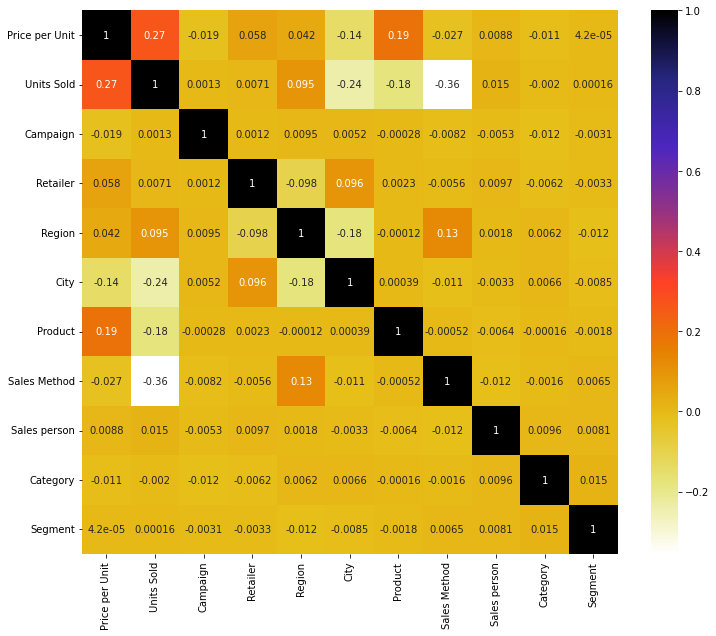

In [72]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [73]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [74]:
corr_features = correlation(data, 0.7)
len(set(corr_features))

0

In [75]:
corr_features

set()

#### Feature Selection- Information Gain
##### Mutual Information 
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances 

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [76]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(data.select_dtypes(include=numeric_lst).columns)

In [77]:
numerical_cols

['Price per Unit',
 'Units Sold',
 'Campaign',
 'Retailer',
 'Region',
 'City',
 'Product',
 'Sales Method',
 'Sales person',
 'Category',
 'Segment']

In [78]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X.fillna(0), Y)
mutual_info

array([1.33134838e+00, 2.17212025e+00, 0.00000000e+00, 6.49300274e-02,
       1.21695304e-01, 3.61363158e-01, 1.31641308e-01, 2.34971978e-01,
       0.00000000e+00, 1.56744704e-03, 5.99082181e-03])

In [79]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Units Sold        2.172120
Price per Unit    1.331348
City              0.361363
Sales Method      0.234972
Product           0.131641
Region            0.121695
Retailer          0.064930
Segment           0.005991
Category          0.001567
Campaign          0.000000
Sales person      0.000000
dtype: float64

<AxesSubplot:>

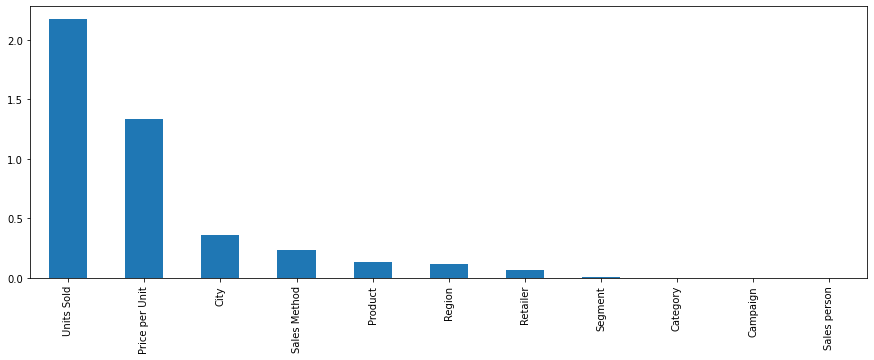

In [80]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [82]:
from sklearn.feature_selection import SelectKBest

#Select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_regression, k=5)
sel_five_cols.fit(X, Y)
X.columns[sel_five_cols.get_support()]

Index(['Price per Unit', 'Units Sold', 'City', 'Product', 'Sales Method'], dtype='object')

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize Total Sale distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

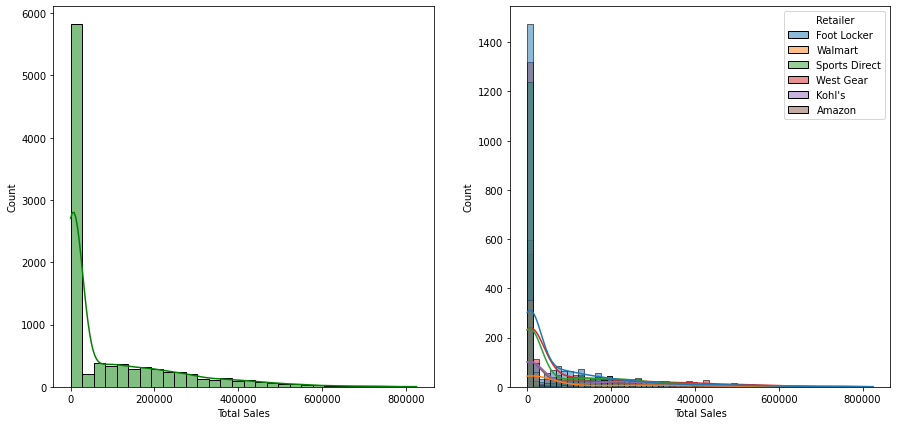

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total Sales',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Sales',kde=True,hue='Retailer')
plt.show()

In [27]:
df[df['Total Sales'] == 0]

,Retailer,Region,City,Product,Price per Unit,Units Sold,Total Sales,Sales Method,Sales person,Campaign,Category,Segment
1019,Foot Locker,Midwest,Omaha,Women's Athletic Footwear,35.0,0.0,0.0,Outlet,Rafaelita Blaksland,22,Mix,Select
1025,Foot Locker,Midwest,Omaha,Women's Athletic Footwear,30.0,0.0,0.0,Outlet,Roddy Speechley,16,Urban,Productivity
4907,Foot Locker,Midwest,Omaha,Women's Athletic Footwear,33.0,0.0,0.0,Online,Brien Boise,17,Urban,Extreme
4913,Foot Locker,Midwest,Omaha,Women's Athletic Footwear,27.0,0.0,0.0,Online,Roddy Speechley,9,Urban,Regular
